In [2]:
file_address='all_81_metadata_with_dates.csv'

In [3]:
import pandas as pd


In [4]:
temp=pd.read_csv(file_address,sep='¬')

<ipython-input-4-06e789cdf4f3>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  temp=pd.read_csv(file_address,sep='¬')


In [5]:
temp.loc[
    (temp.species=='human') &
    (temp.organ=='serum') &
    (temp.name=='phosphate')
]

,normalized_intensity,species,organ,name,comment
4078,0.006560,human,serum,phosphate,"date: 2021-04-12 12:00:00, architecture: Leco ..."
6661,0.001929,human,serum,phosphate,"date: 2018-09-29 12:00:00, architecture: Leco ..."
7088,0.009257,human,serum,phosphate,"date: 2020-02-01 12:00:00, architecture: Leco ..."
7218,0.014693,human,serum,phosphate,"date: 2020-03-05 12:00:00, architecture: Leco ..."
7290,0.018511,human,serum,phosphate,"date: 2020-03-08 12:00:00, architecture: Leco ..."
...,...,...,...,...,...
2896371,0.050936,human,serum,phosphate,"date: 2018-07-12 12:00:00, architecture: Leco ..."
2896397,0.001245,human,serum,phosphate,"date: 2018-09-29 12:00:00, architecture: Leco ..."
2896986,0.018578,human,serum,phosphate,"date: 2019-04-23 12:00:00, architecture: Leco ..."
2899121,0.012000,human,serum,phosphate,"date: 2020-01-29 12:00:00, architecture: Leco ..."


In [6]:
temp

,normalized_intensity,species,organ,name,comment
0,0.002854,Human,serum,2-ketoisocaproic acid minor,"date: 2014-03-17 00:00:00, architecture: Leco ..."
1,0.225704,Human,serum,3-hydroxybutyric acid,"date: 2014-03-17 00:00:00, architecture: Leco ..."
2,0.282699,Human,serum,z mstfa artifact,"date: 2014-03-17 00:00:00, architecture: Leco ..."
3,0.037040,Human,serum,2-hydroxybutanoic acid,"date: 2014-03-17 00:00:00, architecture: Leco ..."
4,0.003298,Human,serum,62,"date: 2014-03-17 00:00:00, architecture: Leco ..."
...,...,...,...,...,...
2899458,0.153993,human,serum,z C09 FAME internal standard,"date: 2019-04-15 12:00:00, architecture: Leco ..."
2899459,0.124645,human,serum,z C08 FAME internal standard,"date: 2019-04-15 12:00:00, architecture: Leco ..."
2899460,0.158661,human,serum,z C16 FAME internal standard,"date: 2019-04-15 12:00:00, architecture: Leco ..."
2899461,0.142259,human,serum,z C14 FAME internal standard,"date: 2019-04-15 12:00:00, architecture: Leco ..."


In [7]:
def select_year(temp_string):
    return temp_string[6:10]

In [8]:
temp['year']=temp['comment'].map(select_year)

In [9]:
temp=temp.loc[temp.normalized_intensity !=0].copy(deep=True)

In [10]:
temp

,normalized_intensity,species,organ,name,comment,year
0,0.002854,Human,serum,2-ketoisocaproic acid minor,"date: 2014-03-17 00:00:00, architecture: Leco ...",2014
1,0.225704,Human,serum,3-hydroxybutyric acid,"date: 2014-03-17 00:00:00, architecture: Leco ...",2014
2,0.282699,Human,serum,z mstfa artifact,"date: 2014-03-17 00:00:00, architecture: Leco ...",2014
3,0.037040,Human,serum,2-hydroxybutanoic acid,"date: 2014-03-17 00:00:00, architecture: Leco ...",2014
4,0.003298,Human,serum,62,"date: 2014-03-17 00:00:00, architecture: Leco ...",2014
...,...,...,...,...,...,...
2899458,0.153993,human,serum,z C09 FAME internal standard,"date: 2019-04-15 12:00:00, architecture: Leco ...",2019
2899459,0.124645,human,serum,z C08 FAME internal standard,"date: 2019-04-15 12:00:00, architecture: Leco ...",2019
2899460,0.158661,human,serum,z C16 FAME internal standard,"date: 2019-04-15 12:00:00, architecture: Leco ...",2019
2899461,0.142259,human,serum,z C14 FAME internal standard,"date: 2019-04-15 12:00:00, architecture: Leco ...",2019


<AxesSubplot:>

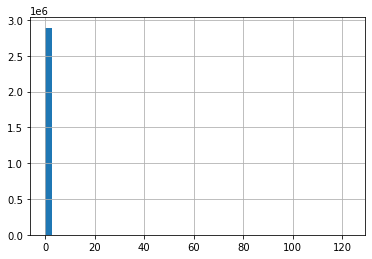

In [11]:
temp.normalized_intensity.hist(bins=50)

In [12]:
import numpy as np

In [13]:
temp['log']=np.log(temp['normalized_intensity'])

In [14]:
max=temp.log.max()
max

4.812731139059609

In [15]:
min=temp.log.min()
min

-14.61160098502155

<AxesSubplot:>

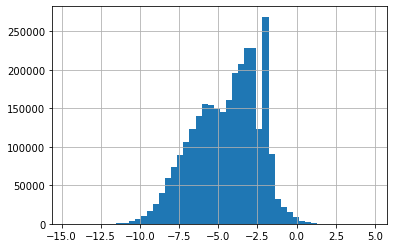

In [16]:
temp.log.hist(bins=50)

In [17]:
earliest=temp.year.astype(float).min()
earliest

latest=temp.year.astype(float).max()
latest

2021.0

In [18]:
earliest

2011.0

In [19]:
#get the bins for the entire panda. we will want to do this for each subset later
bin_count=100
bin_size=abs((abs(max)+abs(min)))/bin_count
bin_size

0.19424332124081156

In [20]:
#get the average year for the entire panda
#we will want to do this for each subset later
average_year_list=list()
for i in range((bin_count)):
    bin_edge_1=min+bin_size*i
    bin_edge_2=min+bin_size*i+bin_size
    average_year_list.append(temp.loc[(temp.log>=bin_edge_1) & (temp.log<bin_edge_2)]['year'].astype(float).mean())

In [21]:
color_bar_list=list()
for i in range(len(average_year_list)):
    if pd.isnull(average_year_list[i]):
        #print(average_year_list[i])
        color_bar_list.append(0)
    else:
        color_bar_list.append((average_year_list[i]-earliest)/(latest-earliest))

In [22]:
import matplotlib.pyplot as plt

In [23]:
my_cmap=plt.get_cmap('inferno')

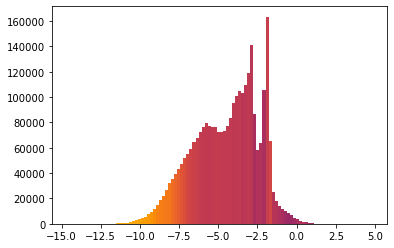

In [24]:
N,bins,patches=plt.hist(temp['log'],100)
for i in range(len(patches)):
    patches[i].set_facecolor(my_cmap(color_bar_list[i]))

In [25]:
# fig,axs=plt.subplots(1,len(temp['year'].unique()),figsize=(20,5))
# for i,temp_year in enumerate(temp['year'].unique()):
#     print(i)
#     #temp['log'].loc[temp['year']==i].hist(bins=100)
#     axs[i].hist(temp['log'].loc[temp['year']==temp_year].to_list(),bins=100,range=(min,max))
#     #axs[i].set_ylim([0,120],auto=True)

In [26]:
# fig,axs=plt.subplots(len(temp['year'].unique()),1,figsize=(20,20))
# for i,temp_year in enumerate(temp['year'].unique()):
#     print(i)
#     #temp['log'].loc[temp['year']==i].hist(bins=100)
#     axs[i].hist(temp['log'].loc[temp['year']==temp_year].to_list(),bins=100,range=(min,max))
#     #axs[i].set_ylim([0,120],auto=True)

In [27]:
temp_grouped_by_soc=temp.groupby(by=['species','organ','name'],axis='index').count()

temp_grouped_by_soc.sort_values(by='log',axis='index',ascending=False,inplace=True)
temp_grouped_by_soc

normalized_intensity  comment  \
species organ   name                                                          
Human   Plasma  z mstfa artifact                             25883    25883   
                z artifact                                   14802    14802   
                z C14 FAME internal standard                 13278    13278   
                z C10 FAME internal standard                 13277    13277   
                z C18 FAME internal standard                 13276    13276   
...                                                            ...      ...   
        Plasma  411172                                           1        1   
human   plasma  411122                                           1        1   
                411165                                           1        1   
                412122                                           1        1   
Human   Plasma  505888                                           1        1   

                                               year    log  
species organ   name                                        
Human   Plasma  z mstfa artifact              25883  25883  
                z artifact                    14802  14802  
                z C14 FAME internal standard  13278  13278  
                z C10 FAME internal standard  13277  13277  
                z C18 FAME internal standard  13276  13276  
...                                             ...    ...  
        Plasma  411172                            1      1  
human   plasma  411122                            1      1  
                411165                            1      1  
                412122                            1      1  
Human   Plasma  505888                            1      1  

[10649 rows x 4 columns]

In [28]:
number_of_metadata=30
number_of_compounds=16

In [29]:
temp['metadata_combos']=list(zip(temp['species'],temp['organ']))


In [30]:
#metadata_combos=list(set(tuple(zip(temp['species'],temp['organ']))))


In [31]:
#got the top 30 from the other analysis
metadata_combos=[('Human', 'Plasma '),
 ('human', 'plasma'),
 ('Human', 'serum'),
 ('human', 'serum'),
 ('Human', 'urine'),
 ('human', 'EDTA Plasma'),
 ('Mouse', 'Liver'),
 ('Human', 'plasma'),
 ('mouse', 'plasma'),
 ('mouse', 'serum'),
 ('human', 'urine'),
 ('Mouse', 'Plasma '),
 ('Human', 'EDTA Plasma'),
 ('Mouse', 'serum'),
 ('Human', 'Plasma'),
 ('Mouse', 'urine'),
 ('Rat', 'serum'),
 ('Rat', 'Plasma '),
 ('Mouse', 'plasma'),
 ('Mouse', 'Muscle'),
 ('Human', 'Liver'),
 ('Sheep', 'Plasma '),
 ('Mouse', 'spinal cord'),
 ('Horse', 'Plasma'),
 ('Horse', 'Plasma '),
 ('mouse', 'spinal cord'),
 ('bovine', 'plasma'),
 ('bovine', 'serum'),
 ('Mouse', 'Plasma'),
 ('Mouse', 'EDTA Plasma'),
 ('canine', 'plasma'),
 ('BioRec', 'Plasma'),
 ('Human', 'cell '),
 ('mouse', 'bone marrow macrophage'),
 ('Mouse', 'cell '),
 ('BioRec', 'Plasma '),
 ('Rat', 'Liver'),
 ('human', 'lymphocytes'),
 ('mouse', 'Liver'),
 ('feline', 'serum'),
 ('equine', 'plasma'),
 ('corn', 'exudate'),
 ('Sheep', 'Uterine Arteries'),
 ('canine', 'serum'),
 ('mouse', 'Muscle'),
 ('mouse', 'Left ventricle'),
 ('mouse', 'Hypothalamus'),
 ('mouse', 'muscle tissue'),
 ('porcine', 'EDTA Plasma'),
 ('bovine', 'EDTA Plasma'),
 ('Strawberry', 'strawberry'),
 ('Rat', 'Ileum tissue'),
 ('Mouse', 'epithelial cells'),
 ('Phasoulus', 'branch'),
 ('BioRec', 'With ITSD'),
 ('E. coli', 'conditioned medium'),
 ('E. salsuginem', 'root'),
 ('E. salsuginem', 'shoot'),
 ('Human', 'bone marrow macrophage'),
 ('Human Feces', 'NIST Aqueous Fecal'),
 ('Human Feces', 'NIST Lyophilized Fecal'),
 ('Mouse', 'cancer cell line'),
 ('Sheep', 'Plasma'),
 ('raw material', 'cell '),
 ('Sheep', 'Carotid'),
 ('Porcine', 'plasma'),
 ('Rat', 'Esophagus epithelia'),
 ('Rattus rattus', 'Plasma '),
 ('Rat', 'urine'),
 ('Horse', 'spinal cord'),
 ('Blank', 'QC'),
 ('bovine', 'urine'),
 ('Plant', 'head'),
 ('Mouse', 'bone marrow macrophage'),
 ('Sheep', 'urine'),
 ('Rat', 'Plasma'),
 ('human', 'muscle tissue'),
 ('Horse', 'plasma'),
 ('mouse', 'urine'),
 ('Rat', 'plasma'),
 ('Porcine', 'Liver')]
#metadata_combos=[('human','serum')]

In [32]:
compounds=list(temp['name'].unique())


In [33]:
compounds_sublist=['1,5-anhydroglucitol','alanine',
'cholesterol',  'glucose',
'glutamine','glycine',
'isoleucine',     
'leucine',    
'lysine',   
'oxoproline',  
'palmitic acid',
'phosphate',
'proline',
'stearic acid',  
'tryptophan 3TMS',
'tyrosine', 
'valine',
'z mstfa artifact' ]

In [34]:
#earliest=temp.year.astype(float).min()
earlist=temp.loc[
    (temp['metadata_combos'].isin(metadata_combos)) &
    (temp['name'].isin(compounds_sublist))
].year.astype(float).min()
earliest

#latest=temp.year.astype(float).max()
latest=temp.loc[
    (temp['metadata_combos'].isin(metadata_combos)) &
    (temp['name'].isin(compounds_sublist))
].year.astype(float).max()

latest

2021.0

In [35]:
earliest

2011.0

In [36]:
temp.loc[
    (temp['metadata_combos'].isin(metadata_combos)) &
    (temp['name'].isin(compounds_sublist))
]

,normalized_intensity,species,organ,name,comment,year,log,metadata_combos
2,0.282699,Human,serum,z mstfa artifact,"date: 2014-03-17 00:00:00, architecture: Leco ...",2014,-1.263373,"(Human, serum)"
5,0.249542,Human,serum,alanine,"date: 2014-03-17 00:00:00, architecture: Leco ...",2014,-1.388126,"(Human, serum)"
19,0.024453,Human,serum,tryptophan 3TMS,"date: 2014-03-17 00:00:00, architecture: Leco ...",2014,-3.711019,"(Human, serum)"
23,0.029889,Human,serum,palmitic acid,"date: 2014-03-17 00:00:00, architecture: Leco ...",2014,-3.510278,"(Human, serum)"
27,0.026778,Human,serum,tyrosine,"date: 2014-03-17 00:00:00, architecture: Leco ...",2014,-3.620157,"(Human, serum)"
...,...,...,...,...,...,...,...,...
2899446,0.010047,human,serum,phosphate,"date: 2019-04-15 12:00:00, architecture: Leco ...",2019,-4.600492,"(human, serum)"
2899447,0.034440,human,serum,leucine,"date: 2019-04-15 12:00:00, architecture: Leco ...",2019,-3.368550,"(human, serum)"
2899449,0.081143,human,serum,valine,"date: 2019-04-15 12:00:00, architecture: Leco ...",2019,-2.511546,"(human, serum)"
2899450,0.054716,human,serum,z mstfa artifact,"date: 2019-04-15 12:00:00, architecture: Leco ...",2019,-2.905607,"(human, serum)"


In [37]:
temp.loc[
    (temp.species=='human') &
    (temp.organ=='serum') &
    (temp.name=='phosphate')
]

,normalized_intensity,species,organ,name,comment,year,log,metadata_combos
4078,0.006560,human,serum,phosphate,"date: 2021-04-12 12:00:00, architecture: Leco ...",2021,-5.026742,"(human, serum)"
6661,0.001929,human,serum,phosphate,"date: 2018-09-29 12:00:00, architecture: Leco ...",2018,-6.250551,"(human, serum)"
7088,0.009257,human,serum,phosphate,"date: 2020-02-01 12:00:00, architecture: Leco ...",2020,-4.682413,"(human, serum)"
7218,0.014693,human,serum,phosphate,"date: 2020-03-05 12:00:00, architecture: Leco ...",2020,-4.220406,"(human, serum)"
7290,0.018511,human,serum,phosphate,"date: 2020-03-08 12:00:00, architecture: Leco ...",2020,-3.989375,"(human, serum)"
...,...,...,...,...,...,...,...,...
2896371,0.050936,human,serum,phosphate,"date: 2018-07-12 12:00:00, architecture: Leco ...",2018,-2.977183,"(human, serum)"
2896397,0.001245,human,serum,phosphate,"date: 2018-09-29 12:00:00, architecture: Leco ...",2018,-6.688374,"(human, serum)"
2896986,0.018578,human,serum,phosphate,"date: 2019-04-23 12:00:00, architecture: Leco ...",2019,-3.985753,"(human, serum)"
2899121,0.012000,human,serum,phosphate,"date: 2020-01-29 12:00:00, architecture: Leco ...",2020,-4.422812,"(human, serum)"


In [38]:
temp.loc[
    (temp.metadata_combos==('human','serum')) &
    (temp.name=='phosphate')
]

,normalized_intensity,species,organ,name,comment,year,log,metadata_combos
4078,0.006560,human,serum,phosphate,"date: 2021-04-12 12:00:00, architecture: Leco ...",2021,-5.026742,"(human, serum)"
6661,0.001929,human,serum,phosphate,"date: 2018-09-29 12:00:00, architecture: Leco ...",2018,-6.250551,"(human, serum)"
7088,0.009257,human,serum,phosphate,"date: 2020-02-01 12:00:00, architecture: Leco ...",2020,-4.682413,"(human, serum)"
7218,0.014693,human,serum,phosphate,"date: 2020-03-05 12:00:00, architecture: Leco ...",2020,-4.220406,"(human, serum)"
7290,0.018511,human,serum,phosphate,"date: 2020-03-08 12:00:00, architecture: Leco ...",2020,-3.989375,"(human, serum)"
...,...,...,...,...,...,...,...,...
2896371,0.050936,human,serum,phosphate,"date: 2018-07-12 12:00:00, architecture: Leco ...",2018,-2.977183,"(human, serum)"
2896397,0.001245,human,serum,phosphate,"date: 2018-09-29 12:00:00, architecture: Leco ...",2018,-6.688374,"(human, serum)"
2896986,0.018578,human,serum,phosphate,"date: 2019-04-23 12:00:00, architecture: Leco ...",2019,-3.985753,"(human, serum)"
2899121,0.012000,human,serum,phosphate,"date: 2020-01-29 12:00:00, architecture: Leco ...",2020,-4.422812,"(human, serum)"


array([[<AxesSubplot:title={'center':'normalized_intensity'}>,
        <AxesSubplot:title={'center':'log'}>]], dtype=object)

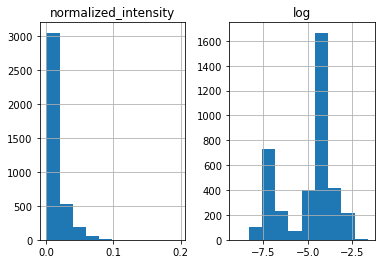

In [39]:
temp.loc[
    (temp.metadata_combos==('human','serum')) &
    (temp.name=='phosphate')
].hist()

array([[<AxesSubplot:title={'center':'normalized_intensity'}>,
        <AxesSubplot:title={'center':'log'}>]], dtype=object)

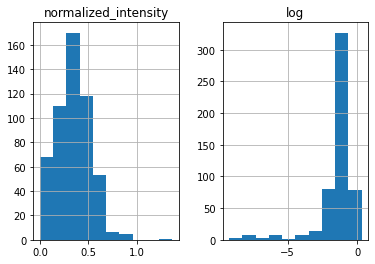

In [40]:
temp.loc[
    (temp.metadata_combos==('human','serum')) &
    (temp.name=='glucose')
].hist()

In [41]:
# my_cmap=plt.get_cmap('inferno')

# compounds_sublist=[
#     'phosphate'
# ]

# metadata_combos=[
#     ('human','serum')
# ]

# metadata_start_num=0
# metadata_end_num=1

# number_of_compounds=1
# number_of_metadata=1

# earliest=2018.0
# latest=2021.0

In [42]:
print(min)
print(max)

-14.61160098502155
4.812731139059609


In [43]:
def get_matplotlib_color_info(temp_panda):
    #get the average year for the entire panda
    #we will want to do this for each subset later
    ###print(temp_panda)
    ###hold=input('hold')
    average_year_list=list()
    for k in range((bin_count)):
        bin_edge_1=min+bin_size*k
        bin_edge_2=min+bin_size*k+bin_size
        average_year_list.append(temp_panda.loc[(temp.log>=bin_edge_1) & (temp_panda.log<bin_edge_2)]['year'].astype(float).mean())
        ###print(temp_panda.loc[(temp.log>=bin_edge_1) & (temp_panda.log<bin_edge_2)]['year'])
        ###print(average_year_list)
        #hold=input('hold')
    color_bar_list=list()
    for l in range(len(average_year_list)):
        if pd.isnull(average_year_list[l]):
            #print(average_year_list[l])
            color_bar_list.append(0)
        else:
            color_bar_list.append((average_year_list[l]-earliest)/(latest-earliest))
    ###print(list(zip(range(100),average_year_list,color_bar_list)))
    return color_bar_list

5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15


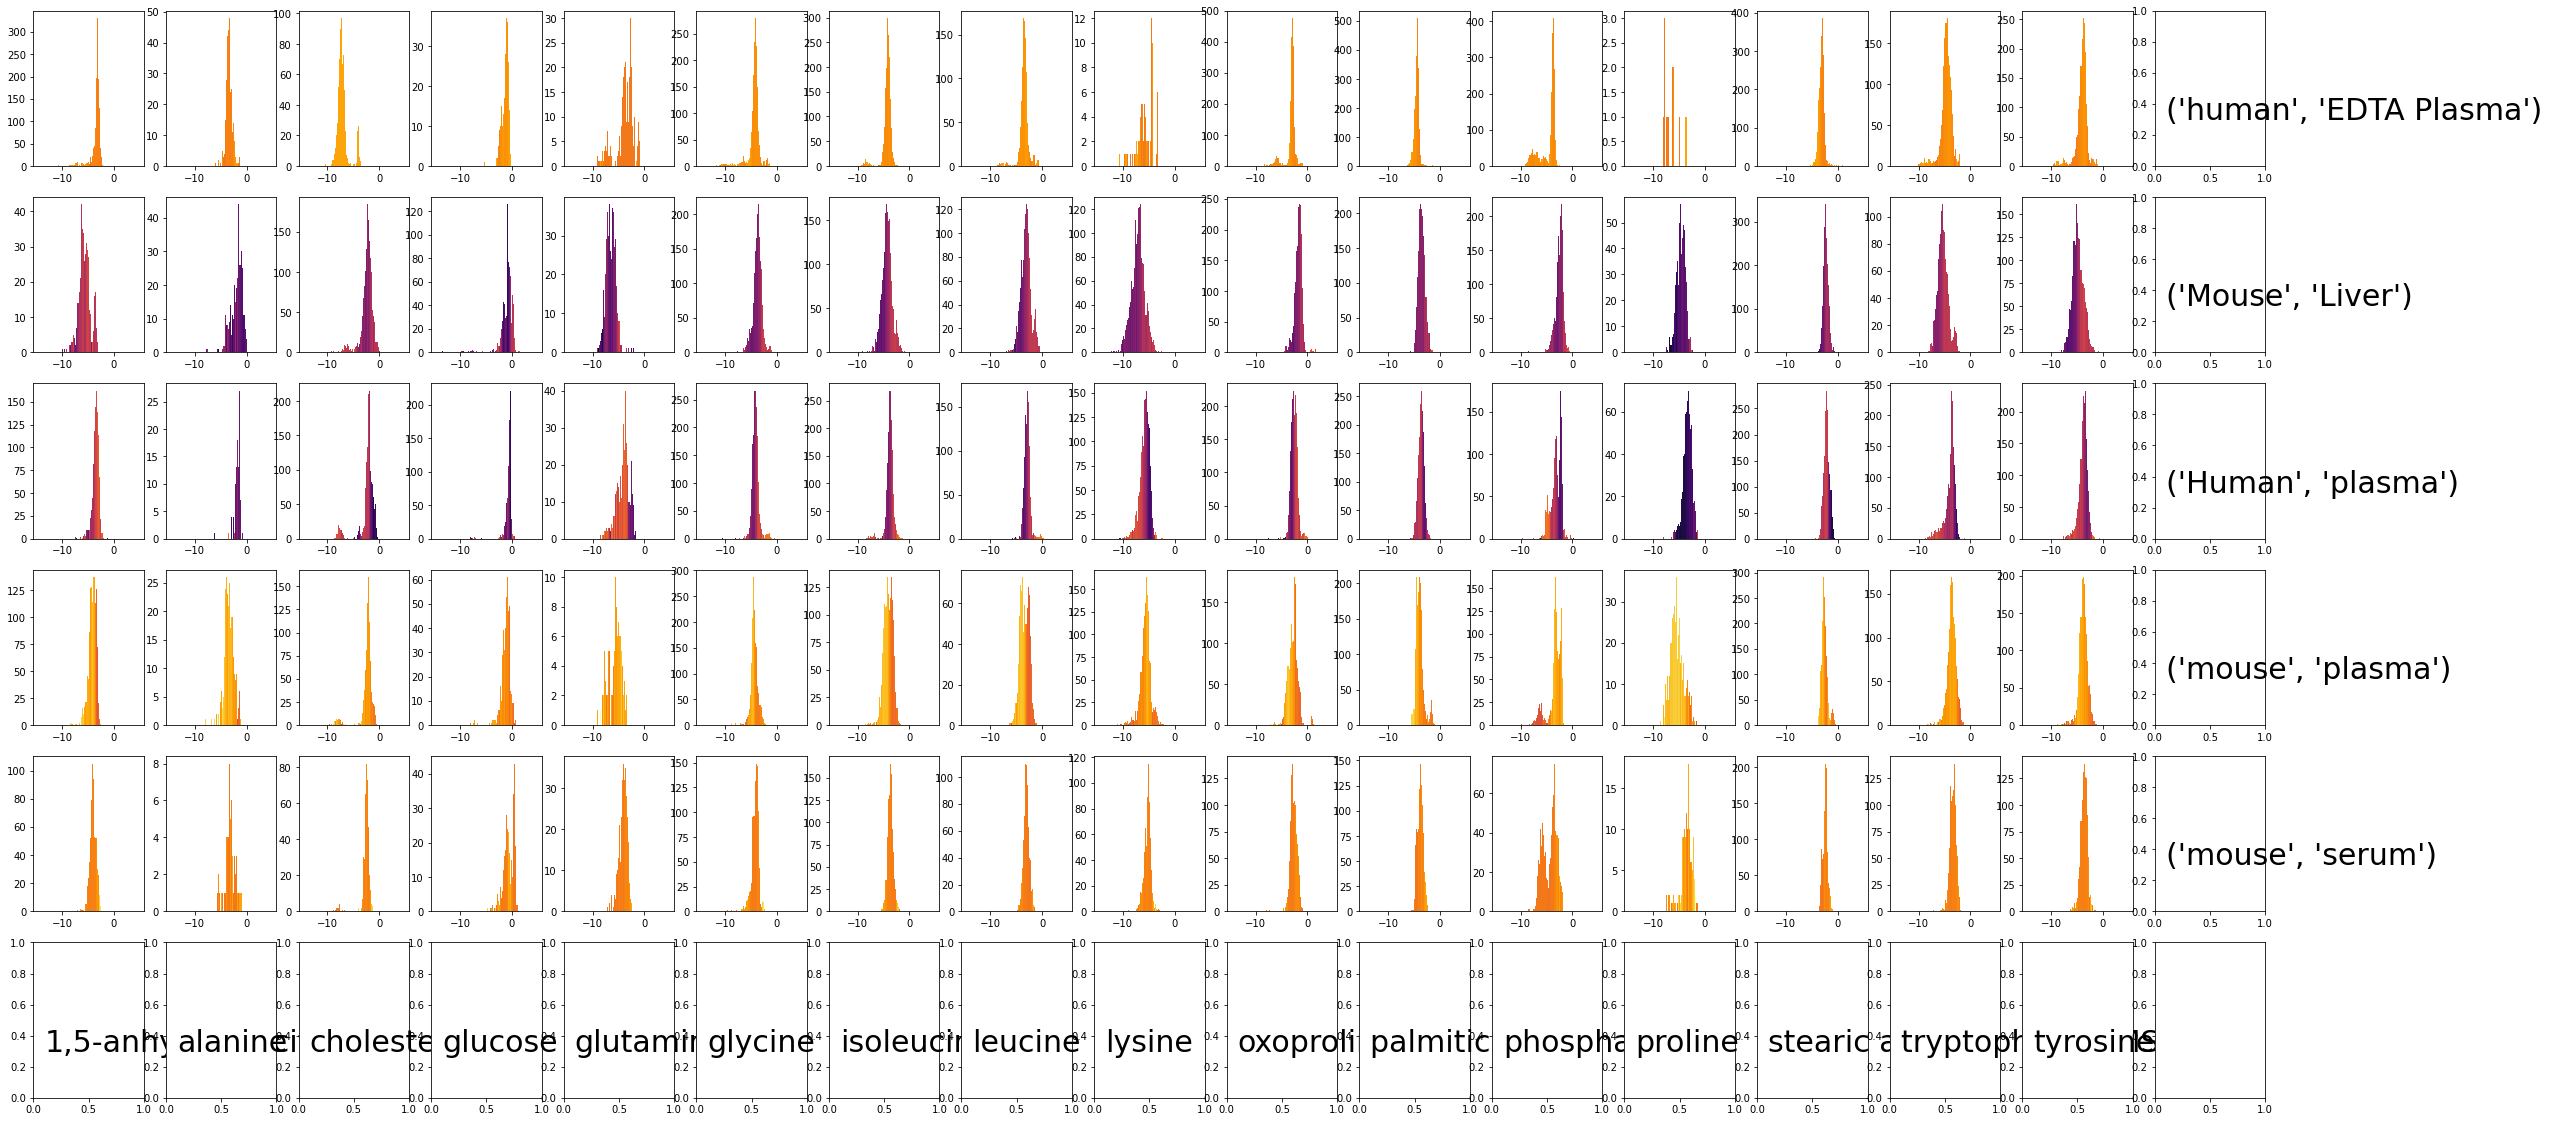

In [44]:
metadata_start_num=5
metadata_end_num=10
number_of_compounds=16

fig,axs=plt.subplots((metadata_end_num-metadata_start_num)+1,number_of_compounds+1,figsize=(40,20))

i-metadata_start_num

#for i in range(number_of_metadata+1):
for i in range(metadata_start_num,metadata_end_num+1):
    
    for j in range(number_of_compounds+1):
        
        if j==number_of_compounds and i!=metadata_end_num:
            axs[i-metadata_start_num,j].set_ylim([0,1],auto=True)
            axs[i-metadata_start_num,j].set_xlim([0,1],auto=True)
            species_organ_as_string=str(metadata_combos[i])
            axs[i-metadata_start_num,j].text(
                x=0.1,
                y=0.3,
                fontsize=30,
                s=species_organ_as_string#+'\ncount:'+str(histo_info_panda.iloc[i,0].total_sample_count)
            )
        
        if i==metadata_end_num and j!= number_of_compounds:
            axs[i-metadata_start_num,j].set_ylim([0,1],auto=True)
            axs[i-metadata_start_num,j].set_xlim([0,1],auto=True)
            #species_organ_as_string=' '.join(histo_info_panda.iloc[0,j].compound)
            axs[i-metadata_start_num,j].text(
                x=0.1,
                y=0.3,
                fontsize=30,
                #s=species_organ_as_string+'\ncount:'+str(histo_info_panda.iloc[i,0].total_sample_count)
                s=compounds_sublist[j]#str(histo_info_panda.iloc[0,j].compound)
            )        
        
        
        elif j!=number_of_compounds and i!=metadata_end_num:
            
            print(str(i)+' '+str(j))
            #print(i)
            #print(j)
            #print(metadata_combos[i])
            #print(compounds_sublist[j])
            
            temp_colorbar=get_matplotlib_color_info(
                temp.loc[
                    (temp['metadata_combos']==metadata_combos[i]) &
                    (temp['name']==compounds_sublist[j])
                ]
            )
            
            
            N,bins,patches=axs[i-metadata_start_num,j].hist(
                temp['log'].loc[
                    (temp['metadata_combos']==metadata_combos[i]) &
                    (temp['name']==compounds_sublist[j])
                ],
                bins=100,
                range=(min,max)
            )
            
            ###print('number of patches '+str(len(patches)))
            for p in range(len(patches)):
                ###print(p)
                #print(color_bar_list[p])
                ###print(temp_colorbar[p])
                #print(my_cmap)
                ### print(my_cmap(color_bar_list[p]))
                #patches[p].set_facecolor(my_cmap(color_bar_list[p]))
                patches[p].set_facecolor(my_cmap(temp_colorbar[p]))
                        
            #axs[i-metadata_start_num,j].set_xlim(min,max)
            #axs[i-metadata_start_num,j].set_ylim(0,10)
            
            
            #hold=input('hold')
            
plt.savefig('./test_5_to_10.png', facecolor=fig.get_facecolor())            
            
            
#             axs[i,j].hist(
#                 temp['log'].loc[temp['year']==temp_year].to_list(),
#                 bins=100,
#                 range=(min,max)
#             )
#             N,bins,patches=plt.hist(temp['log'],100)
#             for i in range(len(patches)):
#                 patches[i].set_facecolor(my_cmap(color_bar_list[i]))
        
        
#     print(i)
#     #temp['log'].loc[temp['year']==i].hist(bins=100)
#     axs[i].hist(temp['log'].loc[temp['year']==temp_year].to_list(),bins=100,range=(min,max))